In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv'
data = pd.read_csv(url,header=None).values

In [6]:
X = data[:,0].reshape(-1,1) # reshape will convert 2d array to 1D array

In [7]:
y = data[:,1]

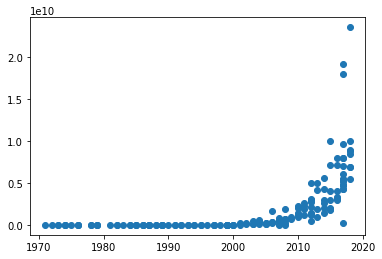

In [8]:
plt.scatter(X,y)

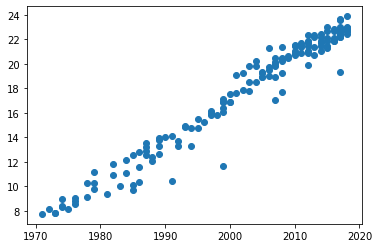

In [9]:
y = np.log(y)
plt.scatter(X,y)

In [10]:
X = X-X.mean()

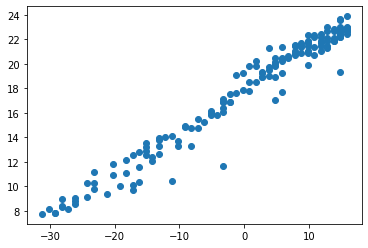

In [11]:
plt.scatter(X,y)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [18]:
# Complier
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.91),loss='mse')

In [19]:
def schedule(epoch,lr):
  if epoch >=50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the Model:
r = model.fit(X,y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 355.9896
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 305.1837
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 254.8262
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 196.9091
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 206.5105
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 114.1768
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 116.8815
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 57.9365
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 46.2564
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 27.9745
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 19.1939
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 14.4482
Epoch 13/200
6/6 [========================

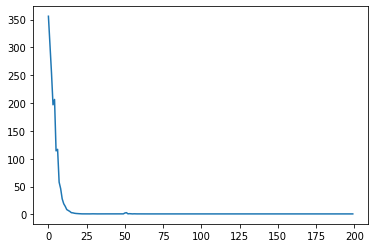

In [20]:
plt.plot(r.history['loss'], label='loss');

In [22]:
print(model.layers)

In [23]:
print(model.layers[0].get_weights())

[array([[0.34578207]], dtype=float32), array([17.771395], dtype=float32)]


In [25]:
a = model.layers[0].get_weights()[0][0,0]
a

0.34578207

In [26]:
print("Time to double:",np.log(2)/a)

Time to double: 2.004578137466022


In [28]:
# Demonstrate the analytical solution for Linear Regression
# This will confirm our above answer too
X = np.array(X).flatten()
Y = np.array(y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a,b)
print("Time to double:", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


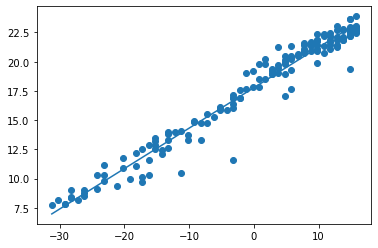

In [29]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat);

In [30]:
# Manual Calculation:
# Weights
w , b = model.layers[0].get_weights()

# Reshape X as we flattened it before
X = X.reshape(-1,1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat , Yhat2)

True